In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('CNS5.csv')

In [58]:
x = df['g_mag'] - df['rp_mag']
y = df['g_mag']
resulting_x = df['g_rp_resulting']

un_deblended = pd.concat([x, y], axis = 1).rename(columns = {0: 'un_deblended'})
deblended = pd.concat([resulting_x, y], axis = 1).rename(columns = {'g_rp_resulting': 'deblended'})

prev_shape = un_deblended.shape[0]

In [59]:
# finding all rows where neither columns are nan
un_deblended = un_deblended[~(un_deblended['un_deblended'].isna() | un_deblended['g_mag'].isna())]
deblended = deblended[~(deblended['deblended'].isna() | deblended['g_mag'].isna())]
print(f'{prev_shape} in original DFs')
print(f'{un_deblended.shape[0]} rows in un_deblended\n{deblended.shape[0]} rows in deblended')


5909 in original DFs
5142 rows in un_deblended
5115 rows in deblended


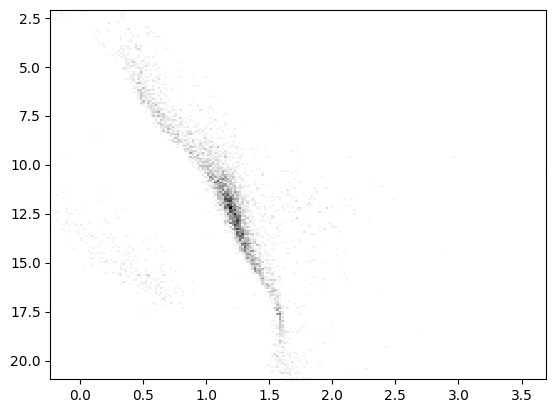

In [76]:
und_hist = plt.hist2d(un_deblended['un_deblended'], un_deblended['g_mag'], bins = 200, cmap = 'binary')

ax = plt.gca().axes
ax.invert_yaxis()

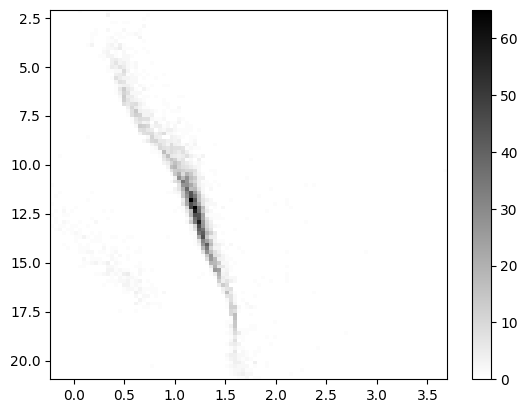

In [87]:
de_hist = plt.hist2d(deblended['deblended'], deblended['g_mag'], bins = 100, cmap = 'binary')

ax = plt.gca().axes
plt.colorbar()

ax.invert_yaxis()